<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch01/blob/main/04_BildformateVereinheitlichen01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bildformate vereinheitlichen

Für maschinelles Lernen und andere Anwendungen ist es oft notwendig, Bilder auf ein einheitliches Format (Breite mal Höhe) zu bringen. Dieses Beispiel zeigt eine Lösung für diese Anforderung.



## Beispieldaten herunterladen

Nach der Ausführung der folgenden Codezelle befindet sich unter `/content/data/img_raw` ein Verzeichnis mit gemischten Bilddateien im Querformat.

Eine Übersicht über die Dateien bekommst Du per Klick auf das Ordnersymbol links. Eventull musst Du die Darstellung mit einem Klick auf das "refresh"-Symbol grafik.png aktualisieren.

In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = "http://pitnoack.de/mn/formate_vereinheitlichen/data.zip"
with urlopen(zipurl) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zfile:
    zfile.extractall()

## Minimum und Maximum der Bildabmessungen finden

Zunächst müssen wir die minimalen und maximalen Abmessungen der Bilder feststellen. Das erledigt die folgende Codezelle. Dabei kommt das Objekt `Image` aus dem Modul `PIL` (Python Imaging Library) zur Anwendung.

In [ ]:
import os
from PIL import Image

img_raw_path = "/content/data/img_raw"
img_resized_path = "/content/data/img_resized/"

min_width = 1000000
max_width = 0
min_height = 1000000
max_height = 0

os.chdir(img_raw_path)
img_filenames = os.listdir()

for img_filename in img_filenames:
  if not os.path.isfile(img_filename):
    continue
  
  img = Image.open(img_filename)
  width, height = img.size
  min_width = min(min_width, width)
  max_width = max(max_width, width)
  min_height = min(min_height, height)
  max_height = max(max_height, height)

print("minimale breite:", min_width)
print("maximale breite:", max_width)
print("minimale höhe:", min_height)
print("maximale höhe:", max_height)

minimale breite: 512
maximale breite: 9105
minimale höhe: 341
maximale höhe: 6986


## Bilder auf minimale Breite und Höhe skalieren

In diesem Beispiel skalieren wir die Bilder auf die eben festgestellten minimalen Abmessungen. Genauer gesagt: *auf das jeweils nächste, abgerundete Vielfache von 8*. Das hat den Hintergrund, dass Bilder in einem solchen Format für eine Vielzahl von Anwendungssituationen (Faltungsnetze, Autoencoder) besser geeignet sind.

Die folgende Codezelle definiert eine Funktion, die das nächstgelegene, niedrigere Vielfache von 8 zu einem gegebenen Wert findet:

In [ ]:
from math import floor

def next_multiple_of_8(x):
  return 8 * floor(x/8)

Hier passiert die eigentliche Arbeit. Die Funktion `PIL.ImageOps.fit()` macht genau das, was wir wollen:

`fit(bild, (breite, hohe))` liefert ein Bild, das auf `(breite, hoehe)` skaliert ist. Wenn die Seitenverhältnisse des Bildes nicht mit jenem von `(breite, hoehe)` übereinstimmt, dann wird das Bild entsprechend an den Rändern beschnitten.

Nach der Ausführung der folgenden Codezelle findet ihr unter `/content/data/img_resized` die entsprechend einheitlich skalierten und beschnittenen Bilder.

In [ ]:
from PIL import ImageOps
import numpy as np


# Wir verwenden hier die minimal gefundenen Breiten und Höhen.
# Die Wahl dieser Parameter ist stark von den jeweils vorhandenen Rohdaten 
# und der geplanten Anwendung abhängig.
resize_width = next_multiple_of_8(min_width)
resize_height = next_multiple_of_8(min_height)

print("Zielgröße:", resize_width, "x", resize_height)

if not os.path.isdir(img_resized_path):
  os.mkdir(img_resized_path)

for img_filename in img_filenames:
  img = Image.open(img_filename)
  resized_img = ImageOps.fit(img, (resize_width, resize_height), Image.ANTIALIAS)
  resized_img.save(img_resized_path+img_filename)

Zielgröße: 512 x 336


## Probe

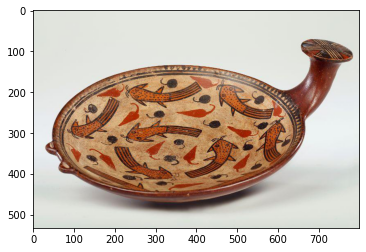

shape raw: (533, 800, 3)


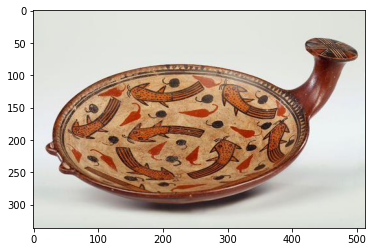

shape resized: (336, 512, 3)


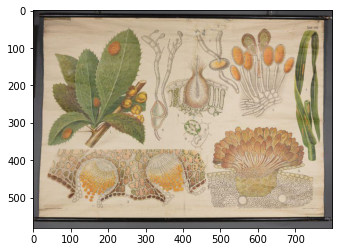

shape raw: (581, 800, 3)


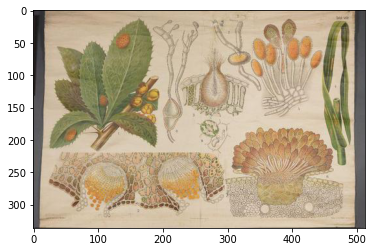

shape resized: (336, 512, 3)


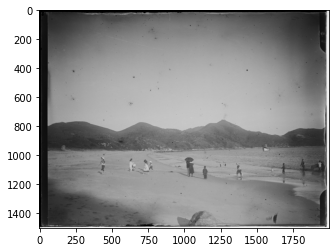

shape raw: (1500, 1999, 3)


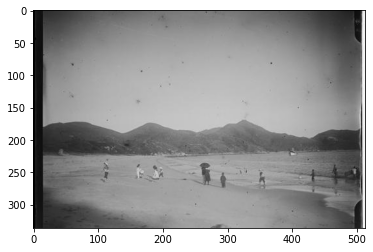

shape resized: (336, 512, 3)


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

def show_raw_and_resized(img_raw_filename, img_resized_filename):
  img = mpimg.imread(img_raw_filename)
  plt.imshow(img)
  plt.show()
  print("shape raw:", img.shape)

  img = mpimg.imread(img_resized_filename)
  plt.imshow(img)
  plt.show()
  print("shape resized:", img.shape)

img_raw_filename = "/content/data/img_raw/1109056_1.jpg"
img_resized_filename = "/content/data/img_resized/1109056_1.jpg"
show_raw_and_resized(img_raw_filename, img_resized_filename)

img_raw_filename = "/content/data/img_raw/456640_19860.jpg"
img_resized_filename = "/content/data/img_resized/456640_19860.jpg"
show_raw_and_resized(img_raw_filename, img_resized_filename)

img_raw_filename = "/content/data/img_raw/P34366.jpg"
img_resized_filename = "/content/data/img_resized/P34366.jpg"
show_raw_and_resized(img_raw_filename, img_resized_filename)